In [52]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [53]:
df = pd.read_csv('playlist_features.csv')
print(df.shape)
df.head()

(1683, 98)


,Track Name,Track ID,Artist,Track popularity,Playlist,danceability,energy,key,loudness,mode,...,otacore,power metal,progressive electro house,scorecore,shonen,symphonic rock,touken ranbu,trancecore,visual kei,vocaloid
0,Hobgoblin,2JTjDYA0vfx8sp5XMTbeqU,CLC,0.0,Kpop 2015-2021,0.621,0.873,11,-2.888,0,...,0,0,0,0,0,0,0,0,0,0
1,HELICOPTER,2hJS7BdEaH9Jo8MeJujsHT,CLC,66.0,Kpop-myselection,0.621,0.873,11,-2.888,0,...,0,0,0,0,0,0,0,0,0,0
2,Liar,67D8AmrRyahBZNKzPBBsJG,CLC,0.0,Kpop 2015-2021,0.735,0.829,6,-3.510,0,...,0,0,0,0,0,0,0,0,0,0
3,BLACK DRESS,4g73tmQQc6pSfe4NMXKrZD,CLC,56.0,Kpop-myselection,0.735,0.870,1,-1.955,1,...,0,0,0,0,0,0,0,0,0,0
4,Devil,3aG0gbuvZ1VeVm68d4J6Yq,CLC,58.0,Kpop-myselection,0.715,0.760,2,-3.353,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df.columns

Index(['Track Name', 'Track ID', 'Artist', 'Track popularity', 'Playlist',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'Artist ID', 'Artist Followers', 'Artist genres',
       'Artist popularity', 'Preference', 'Type', 'anime', 'anime latino',
       'anime lo-fi', 'anime rock', 'anime score', 'art rock',
       'canterbury scene', 'chill r&b', 'chinese idol pop', 'classic j-pop',
       'classic k-pop', 'complextro', 'dance pop', 'edm', 'idol rock',
       'j-acoustic', 'j-idol', 'j-metal', 'j-pixie', 'j-pop',
       'j-pop girl group', 'j-poprock', 'j-rock', 'japanese alternative rock',
       'japanese celtic', 'japanese classical', 'japanese emo',
       'japanese indie rock', 'japanese math rock', 'japanese metalcore',
       'japanese pop punk', 'japanese post-hardcore', 'japanes

In [55]:
feature_columns = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'Track popularity', 'Artist popularity', 'Artist Followers', 'mode']

In [56]:
features = df[feature_columns]

In [57]:
scaler = StandardScaler()
scaled_features=scaler.fit_transform(features)

In [58]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [59]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

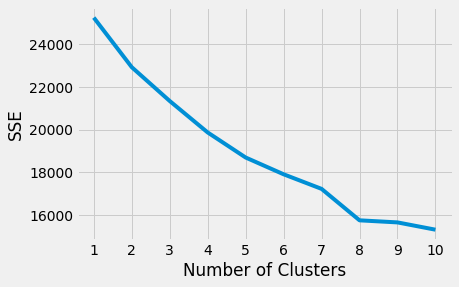

In [60]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [61]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

8

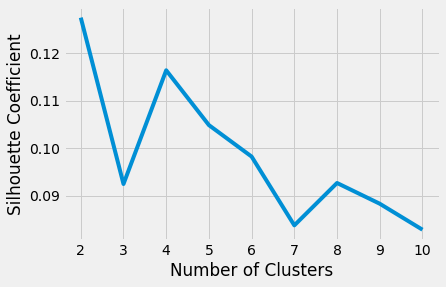

In [62]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [63]:
kmeans_elbow = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [64]:
kmeans_elbow.fit(scaled_features)

KMeans(init='random', n_clusters=5, random_state=42)

In [65]:
label = kmeans_elbow.fit_predict(scaled_features)

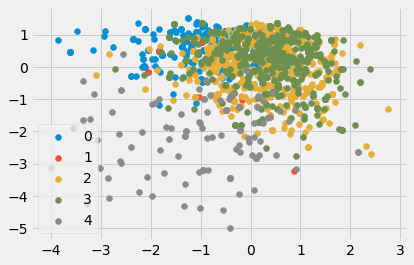

In [67]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(scaled_features[label == i , 0] , scaled_features[label == i , 1] , label = i)
plt.legend()
plt.show()

In [38]:
df['Label']= label
df['Label'] = df['Label'].astype(str)

In [51]:
scaled_features[df['Playlist']]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices